In [4]:
from psqlpass import password
import pandas as pd
import pandas.io.sql as psql
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [7]:
engine = create_engine('postgresql://postgres:' + password + '@localhost:5432/pewlett_hackard')
connection = engine.connect()

In [8]:
query = "select * from employees"
df_employee = psql.read_sql(query, con=connection)

In [9]:
df_employee.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [13]:
df_title = psql.read_sql("select * from titles", con=connection)
df_title.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [14]:
df_salary = psql.read_sql("select * from salaries", con=connection)
df_salary.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [19]:
df = pd.merge(pd.merge(df_employee, df_title, how='inner', on="emp_no"), df_salary, how='inner', on="emp_no")

In [23]:
df

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date_x,to_date_x,salary,from_date_y,to_date_y
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,60117,1986-06-26,1987-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,65828,1996-08-03,1997-08-03
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,40006,1995-12-03,1996-12-02
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,40054,1986-12-01,1987-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,40054,1986-12-01,1987-12-01
5,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,Senior Staff,1996-09-12,9999-01-01,78228,1989-09-12,1990-09-12
6,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,Staff,1989-09-12,1996-09-12,78228,1989-09-12,1990-09-12
7,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,Senior Engineer,1990-08-05,9999-01-01,40000,1990-08-05,1991-08-05
8,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,Senior Staff,1996-02-11,9999-01-01,56724,1989-02-10,1990-02-10
9,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,Staff,1989-02-10,1996-02-11,56724,1989-02-10,1990-02-10


Text(0, 0.5, 'Average Salary')

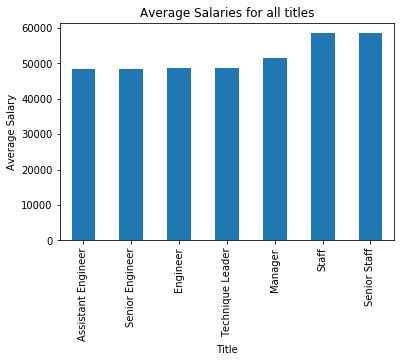

In [29]:
avg_salary = pd.DataFrame(df.groupby("title")["salary"].mean()).sort_values(by="salary")
avg_salary.plot(kind="bar", legend=None)
plt.title("Average Salaries for all titles")
plt.xlabel("Title")
plt.ylabel("Average Salary")

In [30]:
df.groupby("title")["salary"].mean()

title
Assistant Engineer    48493.204786
Engineer              48539.781423
Manager               51531.041667
Senior Engineer       48506.751806
Senior Staff          58503.286614
Staff                 58465.271904
Technique Leader      48580.505772
Name: salary, dtype: float64